<a href="https://colab.research.google.com/github/sudishaG/PCA_Unsupervised/blob/main/USArrests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Installing all python packages, system-level packages and importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot
!pip install cartopy
import cartopy
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
!pip install ISLP
from ISLP import load_data
from sklearn.cluster import \
(KMeans ,
AgglomerativeClustering)
from scipy.cluster.hierarchy import \
(dendrogram ,
cut_tree)
from ISLP.cluster import compute_linkage

E: Package 'libfluidsynth1' has no installation candidate


In [5]:
USArrests = get_rdataset('USArrests').data
USArrests

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [6]:
#Prints the column names of the USArrests DataFrame.
USArrests.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [7]:
#Calculates and prints the mean for each column (variable).
USArrests.mean()

,0
Murder,7.788
Assault,170.760
UrbanPop,65.540
Rape,21.232


In [8]:
#Calculates and prints the variance for each column (variable).
USArrests.var()

,0
Murder,18.970465
Assault,6945.165714
UrbanPop,209.518776
Rape,87.729159


In [9]:
#Creates an object that can perform the necessary data preprocessing (standardization) for PCA.
scaler = StandardScaler(with_std=True ,
with_mean=True)
#Scales the data using the above object scaler.
USArrests_scaled = scaler.fit_transform(USArrests)
#Initializes a PCA object.
pcaUS = PCA()
#Fits the PCA model to the USArrests_scaled data.
pcaUS.fit(USArrests_scaled)
#Accesses the mean_ attribute of the pcaUS object.
pcaUS.mean_

array([-7.10542736e-17,  1.38777878e-16, -4.39648318e-16,  8.59312621e-16])

In [10]:
'''Transforms the scaled data into the principal component scores.
Each row represents an observation (state), and each column
represents its coordinate along a principal component.'''
scores = pcaUS.transform(USArrests_scaled)
#Accesses the components_ attribute of the pcaUS object.
pcaUS.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [-0.6492278 ,  0.74340748, -0.13387773, -0.08902432]])

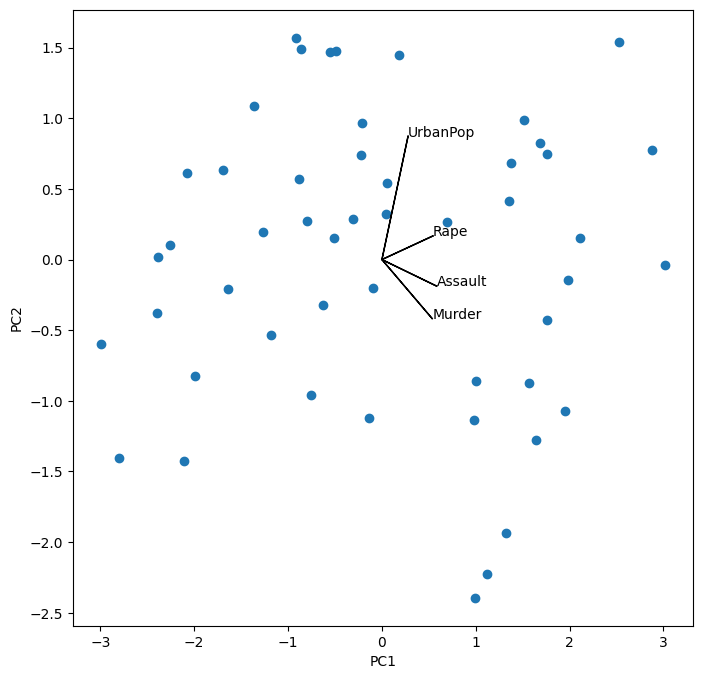

In [11]:
'''Defines variables i and j to specify which principal components
to plot (here, PC1 and PC2, as Python uses 0-based indexing)'''
i, j = 0, 1
#Creates a single plot figure and an axes object for plotting.
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
#Plots the principal component scores as a scatter plot.
ax.scatter(scores[:,0], scores[:,1])
#Sets the labels for the x and y axes.
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
#Loops through each original variable (there are 4 variables) to create a biplot.
for k in range(pcaUS.components_.shape[1]):
  ax.arrow(0, 0, pcaUS.components_[i,k], pcaUS.components_[j,k])
  ax.text(pcaUS.components_[i,k],
    pcaUS.components_[j,k],
    USArrests.columns[k])

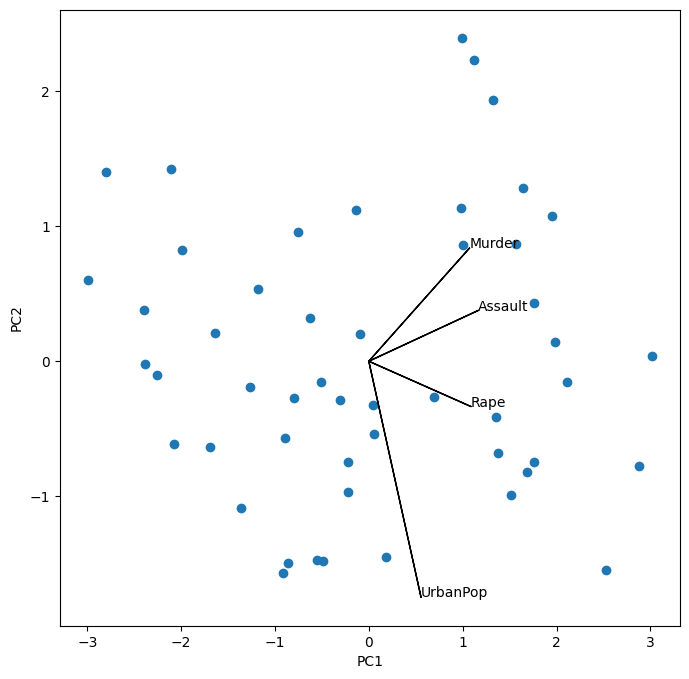

In [12]:
#Sets a scaling factor for the arrows.
scale_arrow = s_ = 2
#Multiplies all values in the second principal component (PC2) scores by -1.
scores[:,1] *= -1
'''Multiplies all values in the second principal component's
loadings by -1 and flipping the y-axis.'''
pcaUS.components_[1] *= -1
#Creating a biplot using the flipped PC2 scores and loadings.
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcaUS.components_.shape[1]):
  ax.arrow(0, 0, s_*pcaUS.components_[i,k], s_*pcaUS.components_[
    j,k])
  ax.text(s_*pcaUS.components_[i,k],
    s_*pcaUS.components_[j,k],
    USArrests.columns[k])

In [13]:
#Calculates the standard deviation of each column (principal component) of the scores matrix.
scores.std(0, ddof=1)

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

In [15]:
#This provides the eigenvalues (variance explained) for each principal component.
pcaUS.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [16]:
#This provides the Proportion of Variance Explained (PVE) by each principal component.
pcaUS.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [27]:
%%capture

fig , axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(pcaUS.n_components_)+1
ax = axes[0]
ax.plot(ticks ,
pcaUS.explained_variance_ratio_ ,
marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

'''With the use of %%capture, it suppresses the displaying of the
partially completed figure of Scree plot. Comment the %%capture to check.'''

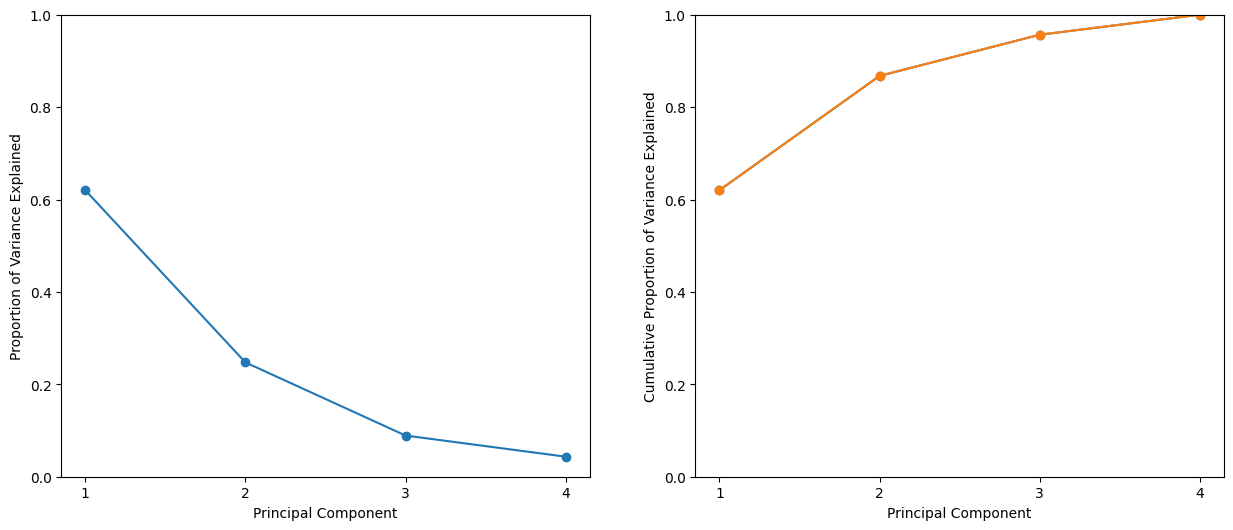

In [29]:
#This plot shows the cumulative proportion of variance explained.
ax = axes[1]
ax.plot(ticks ,
pcaUS.explained_variance_ratio_.cumsum(),
marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig

In [31]:
#Defines a NumPy array a.
a = np.array([1,2,8,-3])
#Calculates the cumulative sum of the elements in a.
np.cumsum(a)

array([ 1,  3, 11,  8])

In [32]:
#Singular Value Decomposition (SVD) & Missing Value processing:

#Assigns the already scaled USArrests data to X.
X = USArrests_scaled
#Performs Singular Value Decomposition on the scaled data matrix X.
U, D, V = np.linalg.svd(X, full_matrices=False)
#Prints the shapes (dimensions) of the U, D, and V matrices/arrays.
U.shape , D.shape , V.shape

((50, 4), (4,), (4, 4))

In [33]:
#Prints the V matrix (right singular vectors) from the SVD.
V

array([[-0.53589947, -0.58318363, -0.27819087, -0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [ 0.34123273,  0.26814843,  0.37801579, -0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [34]:
#Prints the loadings matrix from the PCA object.
pcaUS.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [-0.6492278 ,  0.74340748, -0.13387773, -0.08902432]])

In [37]:
#Calculates the PC scores using the SVD components and selects the first 3 rows.
(U * D[None ,:])[:3]

array([[-0.98556588, -1.13339238,  0.44426879,  0.15626714],
       [-1.95013775, -1.07321326, -2.04000333, -0.43858344],
       [-1.76316354,  0.74595678, -0.05478082, -0.83465292]])

In [39]:
#Prints the first 3 rows of the PC scores obtained directly from the pcaUS object.
scores[:3]

array([[ 0.98556588,  1.13339238, -0.44426879, -0.15626714],
       [ 1.95013775,  1.07321326,  2.04000333,  0.43858344],
       [ 1.76316354, -0.74595678,  0.05478082,  0.83465292]])

In [40]:
#Sets the number of NAs to introduce.
n_omit = 20
#Sets the seed for reproducibility of random number generation.
np.random.seed(15)
#Randomly selects n_omit unique row indices (from 0 to number of rows - 1).
r_idx = np.random.choice(np.arange(X.shape[0]),
  n_omit ,
  replace=False)
'''Randomly selects n_omit column indices (from 0 to number of columns - 1),
with replacement (meaning a column can be selected multiple times).'''
c_idx = np.random.choice(np.arange(X.shape[1]),
  n_omit ,
  replace=True)
#Creates a copy of the scaled data X named Xna.
Xna = X.copy()
#Introduces np.nan (Not a Number) at the randomly selected [row, column] locations in Xna, simulating missing data.
Xna[r_idx , c_idx] = np.nan

#Defines a function named low_rank that takes a matrix X and M as no.of components.
def low_rank(X, M=1):
  U, D, V = np.linalg.svd(X)
  L = U[:,:M] * D[None,:M]
  return L.dot(V[:M])

#Creates a working copy of Xna.
Xhat = Xna.copy()
#Calculates the mean of each column (axis=0) of Xhat, ignoring np.nan values.
Xbar = np.nanmean(Xhat , axis=0)
Xhat[r_idx , c_idx] = Xbar[c_idx]

#Sets a convergence threshold.
thresh = 1e-7
#Initializes the relative error.
rel_err = 1
#Initializes an iteration counter.
count = 0

#Creates a boolean matrix of True/False for Not a Number(np.nan) in Xna.
ismiss = np.isnan(Xna)
#Calculates the mean of the squared non-missing values in Xhat.
mssold = np.mean(Xhat[~ismiss]**2)
#Calculates the mean of the squared non-missing values in the original Xna.
mss0 = np.mean(Xna[~ismiss]**2)

#while loop that continues as long as the rel_err is greater than the thresh.
while rel_err > thresh:
  count += 1
  # Step 2(a)
  Xapp = low_rank(Xhat , M=1)
  # Step 2(b)
  Xhat[ismiss] = Xapp[ismiss]
  # Step 2(c)
  mss = np.mean(((Xna - Xapp)[~ismiss])**2)
  rel_err = (mssold - mss) / mss0
  mssold = mss
  print("Iteration: {0}, MSS:{1:.3f}, Rel.Err {2:.2e}"
    .format(count , mss , rel_err))
'''The above method effectively "fills in" the missing values in a way consistent
with the underlying low-rank structure (dominant principal components) of the data.'''

Iteration: 1, MSS:0.395, Rel.Err 5.99e-01
Iteration: 2, MSS:0.382, Rel.Err 1.33e-02
Iteration: 3, MSS:0.381, Rel.Err 1.44e-03
Iteration: 4, MSS:0.381, Rel.Err 1.79e-04
Iteration: 5, MSS:0.381, Rel.Err 2.58e-05
Iteration: 6, MSS:0.381, Rel.Err 4.22e-06
Iteration: 7, MSS:0.381, Rel.Err 7.65e-07
Iteration: 8, MSS:0.381, Rel.Err 1.48e-07
Iteration: 9, MSS:0.381, Rel.Err 2.95e-08


'The above method effectively "fills in" the missing values in a way consistent \nwith the underlying low-rank structure (dominant principal components) of the data.'

In [41]:
# Calculates the correlation coefficient matrix betwen estimated values(Xapp) & true values(X).
np.corrcoef(Xapp[ismiss], X[ismiss])[0,1]

np.float64(0.7113567434297361)